In [3]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [20]:
from kmodes.kmodes import KModes
from math import sqrt

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KModes(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.cost_)

    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load your dataset
df = pd.read_csv('buscasigno-aloquiros-binarydata.csv')

# Define the number of clusters you want
n_clusters = 3

# Initialize the KModes model
kmodes = KModes(n_clusters=n_clusters)

# Fit the model to your data
kmodes.fit(df)

# Get the cluster assignments for each data point
clusters = kmodes.predict(df)

# Add the cluster assignments to your dataframe
df['cluster'] = clusters

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA and reduce your data to two dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('cluster', axis=1))

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data = pca_result, columns = ['First Principal Component', 'Second Principal Component'])

# Add the cluster assignments to the PCA DataFrame
pca_df['Cluster'] = df['cluster']

# Create a scatter plot of the two PCA components using Seaborn
sns.scatterplot(x='First Principal Component', y='Second Principal Component', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Scatter Plot')
plt.show()

# # Define your target variable (replace 'target' with the name of your target column)
# target = 'target'

# # Split your data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.2, random_state=42)

# # Initialize the LogisticRegression model
# lr = LogisticRegression()

# # Fit the model to your training data
# lr.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = lr.predict(X_test)

KeyboardInterrupt: 

0        0
1        0
2        1
3        2
4        0
        ..
31452    1
31453    0
31454    2
31455    0
31456    1
Name: cluster, Length: 31457, dtype: uint16


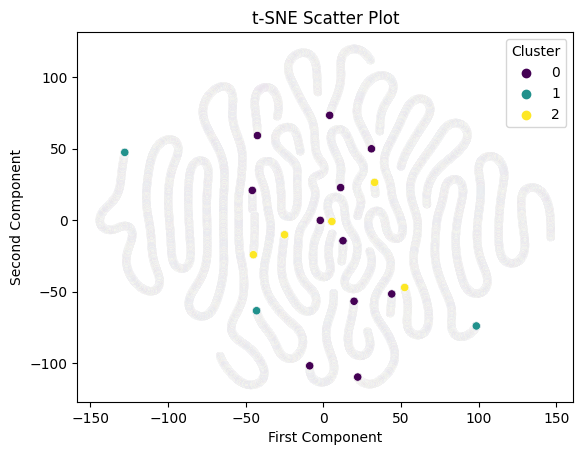

In [15]:
# Load your dataset
df_categoria = pd.read_csv('buscasigno-categoria-binarydata.csv')

# Define the number of clusters you want
n_clusters = 3

# Initialize the KModes model
kmodes = KModes(n_clusters=n_clusters)

# Fit the model to your data
kmodes.fit(df_categoria)

# Get the cluster assignments for each data point
clusters = kmodes.predict(df_categoria)

# Add the cluster assignments to your dataframe
df_categoria['cluster'] = clusters

print(df_categoria['cluster'])

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply t-SNE and reduce your data to two dimensions
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000)
tsne_result = tsne.fit_transform(df_categoria.drop('cluster', axis=1))

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data = tsne_result, columns = ['First Component', 'Second Component'])

# Add the cluster assignments to the t-SNE DataFrame
tsne_df['Cluster'] = df_categoria['cluster']

# Create a scatter plot of the two t-SNE components using Seaborn
sns.scatterplot(x='First Component', y='Second Component', hue='Cluster', data=tsne_df, palette='viridis')
plt.title('t-SNE Scatter Plot')
plt.show()

# # Define your target variable (replace 'target' with the name of your target column)
# target = 'target'

# # Split your data into training and test sets
# X_train_categoria, X_test_categoria, y_train_categoria, y_test_categoria = train_test_split(df_categoria.drop(target, axis=1), df_categoria[target], test_size=0.2, random_state=42)

# # Initialize the LogisticRegression model
# lr_categoria = LogisticRegression()

# # Fit the model to your training data
# lr_categoria.fit(X_train_categoria, y_train_categoria)

# # Make predictions on the test set
# predictions_categoria = lr_categoria.predict(X_test_categoria)

0        3
1        3
2        0
3        0
4        0
        ..
10190    3
10191    1
10192    3
10193    3
10194    3
Name: cluster, Length: 10195, dtype: uint16


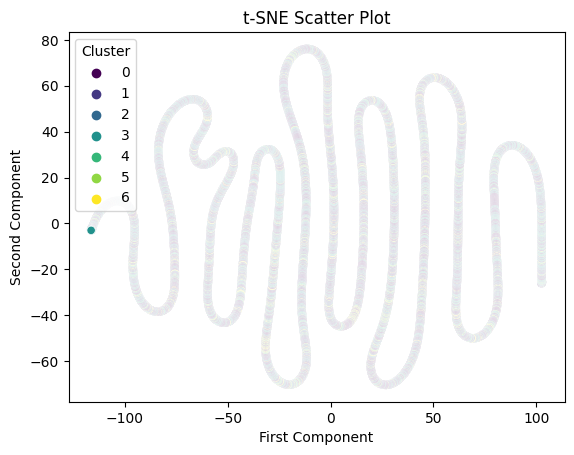

In [22]:
# Load your dataset
df_sematosema = pd.read_csv('buscasigno-sematosema-binarydata.csv')

sum_of_squares = calculate_wcss(df_sematosema)

# Define the number of clusters you want
n_clusters = optimal_number_of_clusters(sum_of_squares)

# Initialize the KModes model
kmodes = KModes(n_clusters=n_clusters)

# Fit the model to your data
kmodes.fit(df_sematosema)

# Get the cluster assignments for each data point
clusters = kmodes.predict(df_sematosema)

# Add the cluster assignments to your dataframe
df_sematosema['cluster'] = clusters

print(df_sematosema['cluster'])

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply t-SNE and reduce your data to two dimensions
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000)
tsne_result = tsne.fit_transform(df_sematosema.drop('cluster', axis=1))

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data = tsne_result, columns = ['First Component', 'Second Component'])

# Add the cluster assignments to the t-SNE DataFrame
tsne_df['Cluster'] = df_sematosema['cluster']

# Create a scatter plot of the two t-SNE components using Seaborn
sns.scatterplot(x='First Component', y='Second Component', hue='Cluster', data=tsne_df, palette='viridis')
plt.title('t-SNE Scatter Plot')
plt.show()

Expressão Facial          10
Local da Articulação     139
Dedos                    312
Movimento                451
Mãos                    1531
dtype: int64


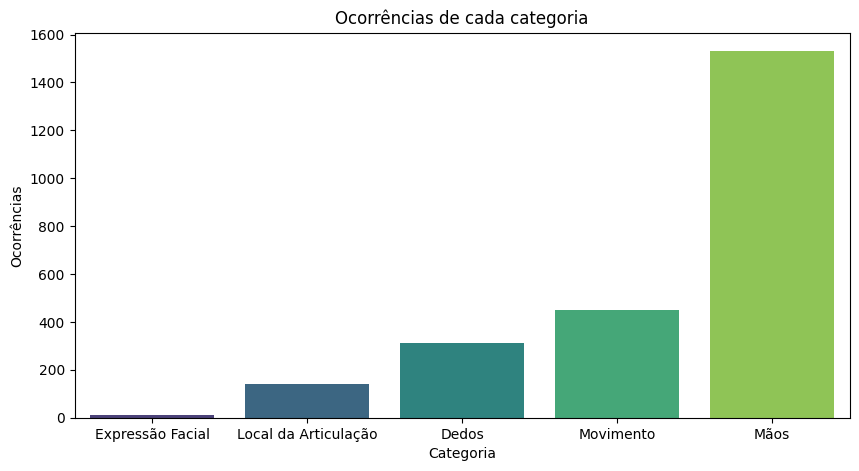

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_most_common_categoria = pd.read_csv('buscasigno-categoria-occurrences.csv')

sum_dataframe = df_most_common_categoria.sum().sort_values()

print(sum_dataframe)

sum_dataframe = sum_dataframe.reset_index()
sum_dataframe.columns = ['Categoria', 'Ocorrências']

plt.figure(figsize=(10, 5))
sns.barplot(x='Categoria', y='Ocorrências', data=sum_dataframe, palette='viridis')
plt.title('Ocorrências de cada categoria')
plt.show()

TME       54
SSP      208
TMD      266
MC       375
MDE      870
PB      1174
SSN     1276
EMF     1290
ADE     1319
CP      2049
QDE     2112
TA      2422
MDD     2599
RF      3197
ADD     3767
FI      5021
MME     6109
QDD     6821
OME     7673
OPE     8086
RM      9390
AME    10089
OMD    14297
OPD    15584
MMD    16284
AMD    20876
dtype: int64


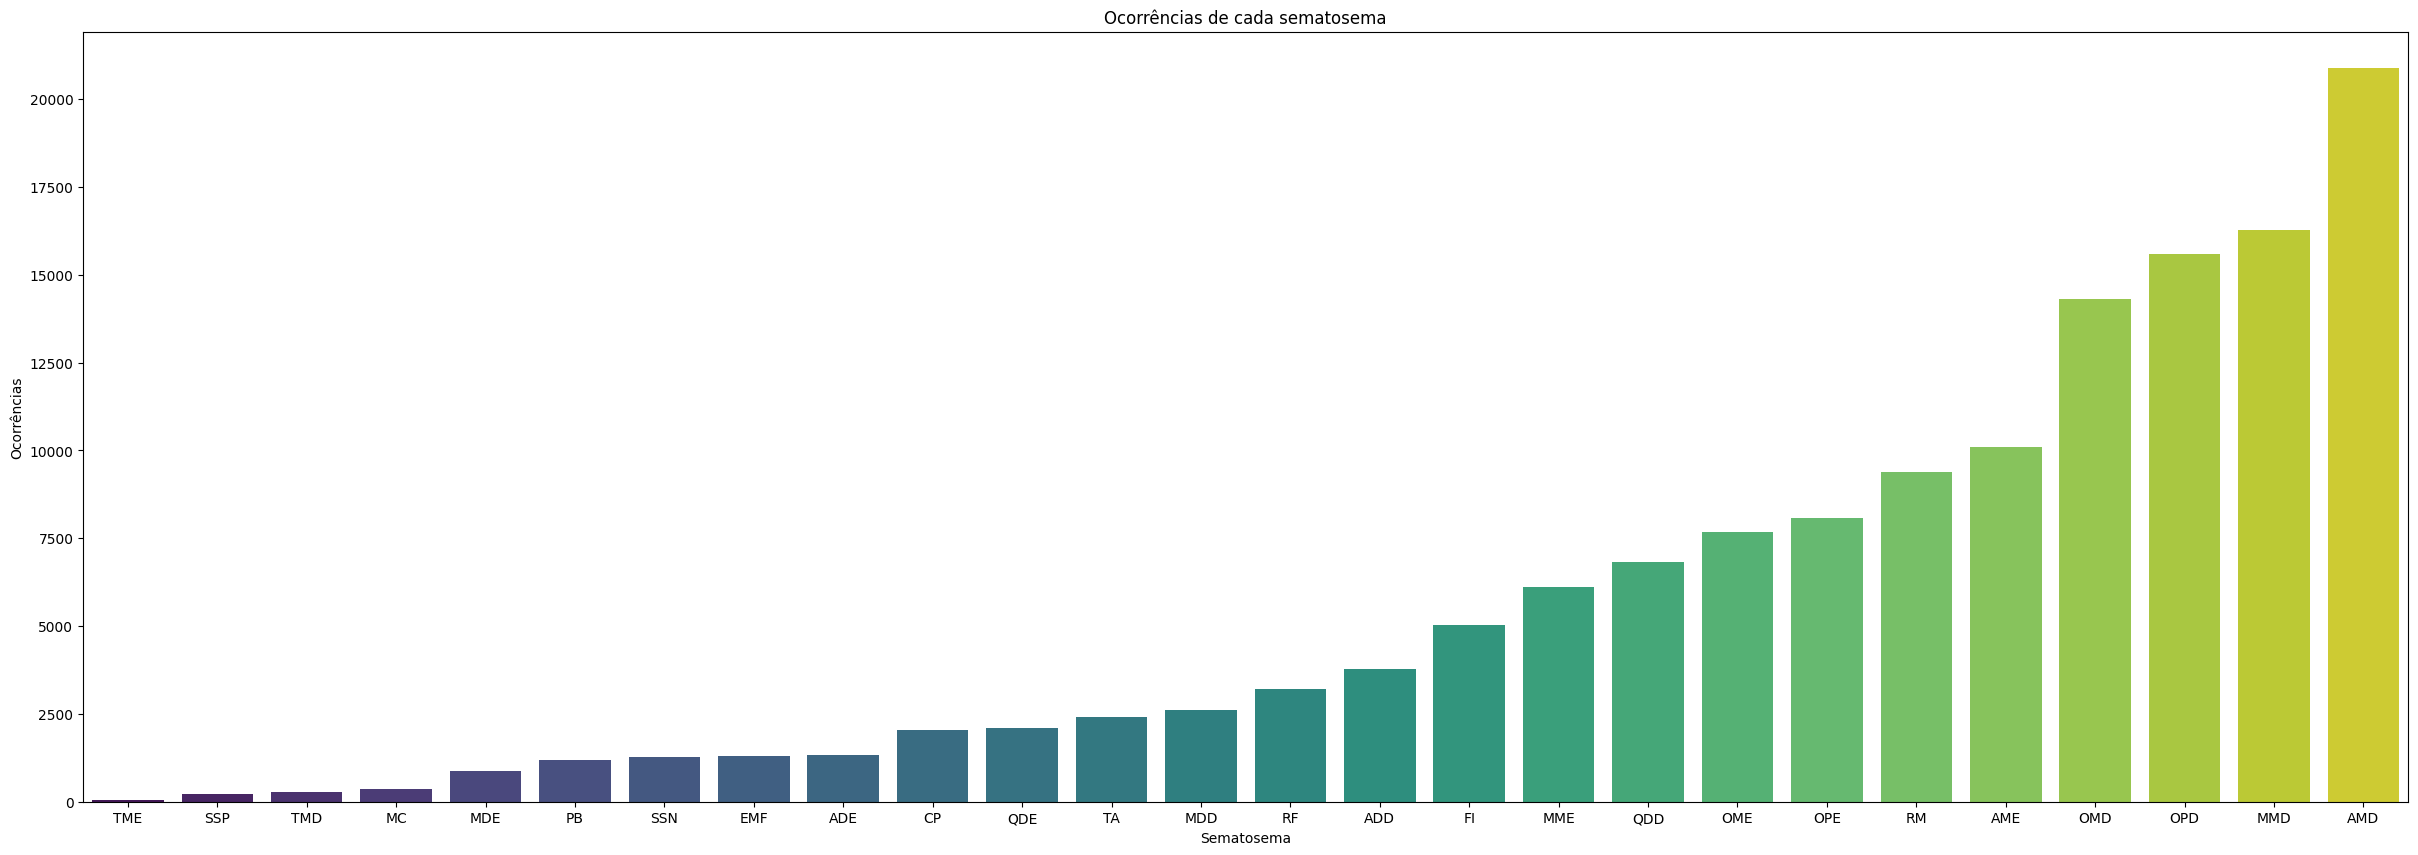

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_most_common_sematosema = pd.read_csv('buscasigno-sematosema-occurrences.csv')

sum_dataframe = df_most_common_sematosema.sum().sort_values()

print(sum_dataframe)

sum_dataframe = sum_dataframe.reset_index()
sum_dataframe.columns = ['Sematosema', 'Ocorrências']

plt.figure(figsize=(30, 10))
sns.barplot(x='Sematosema', y='Ocorrências', data=sum_dataframe, palette='viridis')
plt.title('Ocorrências de cada sematosema')
plt.show()